In [248]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Load the data you receive into a Pandas DataFrame.

In [249]:
df = pd.read_csv('./insurance.csv',error_bad_lines=False)
df.sort_values('age', ascending=False)
df['cahrges']=df['charges'].map({'yes':1,'no':0})
df

/home/firas/401/labs2/lab13/linear-regression/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,age,sex,bmi,children,smoker,region,charges,cahrges
0,19,female,27.900,0,yes,southwest,16884.92400,NaN
1,18,male,33.770,1,no,southeast,1725.55230,NaN
2,28,male,33.000,3,no,southeast,4449.46200,NaN
3,33,male,22.705,0,no,northwest,21984.47061,NaN
4,32,male,28.880,0,no,northwest,3866.85520,NaN
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,NaN
1334,18,female,31.920,0,no,northeast,2205.98080,NaN
1335,18,female,36.850,0,no,southeast,1629.83350,NaN
1336,21,female,25.800,0,no,southwest,2007.94500,NaN


# Show the first five rows of the data set.

In [250]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,cahrges
0,19,female,27.900,0,yes,southwest,16884.92400,NaN
1,18,male,33.770,1,no,southeast,1725.55230,NaN
2,28,male,33.000,3,no,southeast,4449.46200,NaN
3,33,male,22.705,0,no,northwest,21984.47061,NaN
4,32,male,28.880,0,no,northwest,3866.85520,NaN


# Show the description of the data set.

In [251]:
df.describe()

,age,bmi,children,charges,cahrges
count,1338.000000,1338.000000,1338.000000,1338.000000,0.0
mean,39.207025,30.663397,1.094918,13270.422265,NaN
std,14.049960,6.098187,1.205493,12110.011237,NaN
min,18.000000,15.960000,0.000000,1121.873900,NaN
25%,27.000000,26.296250,0.000000,4740.287150,NaN
50%,39.000000,30.400000,1.000000,9382.033000,NaN
75%,51.000000,34.693750,2.000000,16639.912515,NaN
max,64.000000,53.130000,5.000000,63770.428010,NaN


# show the info of the data set

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   cahrges   0 non-null      float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [253]:
df.shape

(1338, 8)

In [254]:
df2 = df.groupby(by=["age"],as_index=False)['charges'].mean()
x=df2['age'].values
y=df2['charges'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=30,test_size=3,random_state=20)
x_train = x_train.reshape(-1,1) 
x_train=x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1,1)
model = LinearRegression().fit(x_train,y_train)
print(f'x_train shape {x_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'x_test shape {x_test.shape}')
print(f'y_test shape {y_test.shape}')

x_train shape (30, 1)
y_train shape (30, 1)
x_test shape (3, 1)
y_test shape (3,)


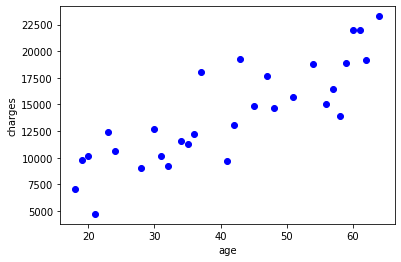

In [255]:

plt.scatter(x_train,y_train,color="blue")
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

In [256]:
print(x)
print(y)
model.score(x_train,y_train)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
[ 7086.21755636  9747.90933456 10159.69773621  4730.46432964
 10012.93280179 12419.82003964 10648.01596214  9838.36531071
  6133.82530857 12184.70172143  9069.18756429 10430.15872704
 12719.11035815 10196.98057333  9220.30029077 12351.53298731
 11613.52812077 11307.1820312  12204.476138   18019.9118772
  8102.733674   11778.2429452  11772.25131     9653.74564963
 13061.03866889 19267.27865333 15859.39658704 14830.19985621
 14342.59063862 17653.9995931  14632.50044517 12696.00626429
 15663.00330069 15682.25586724 18256.26971931 16020.930755
 18758.54647536 16164.54548846 15025.51583654 16447.18525
 13878.9281116  18895.8695316  21979.41850739 22024.4576087
 19163.85657348 19884.99846087 23275.53083727]


0.7106804927842887

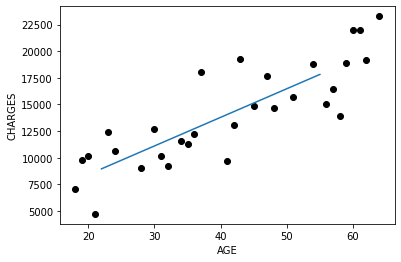

In [257]:

plt.scatter(x_train,y_train,color='black')
plt.plot(x_test,y_predict)
plt.xlabel('AGE')
plt.ylabel('CHARGES')
plt.show()

In [258]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(f"Accuracy of Train {round(lr.score(x_train,y_train)*100,2)} %")
print(f"Accuracy of Test {round(lr.score(x_test,y_test)*100,2)} %")

Accuracy of Train 71.07 %
Accuracy of Test 62.79 %


# Conclusions
## 1. x and y train score is: 0.7106804927842887
## 2. Accuracy of Train for x and y is: 71.07 %
## 3. Accuracy of Test for x and y is: 62.79 %